![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

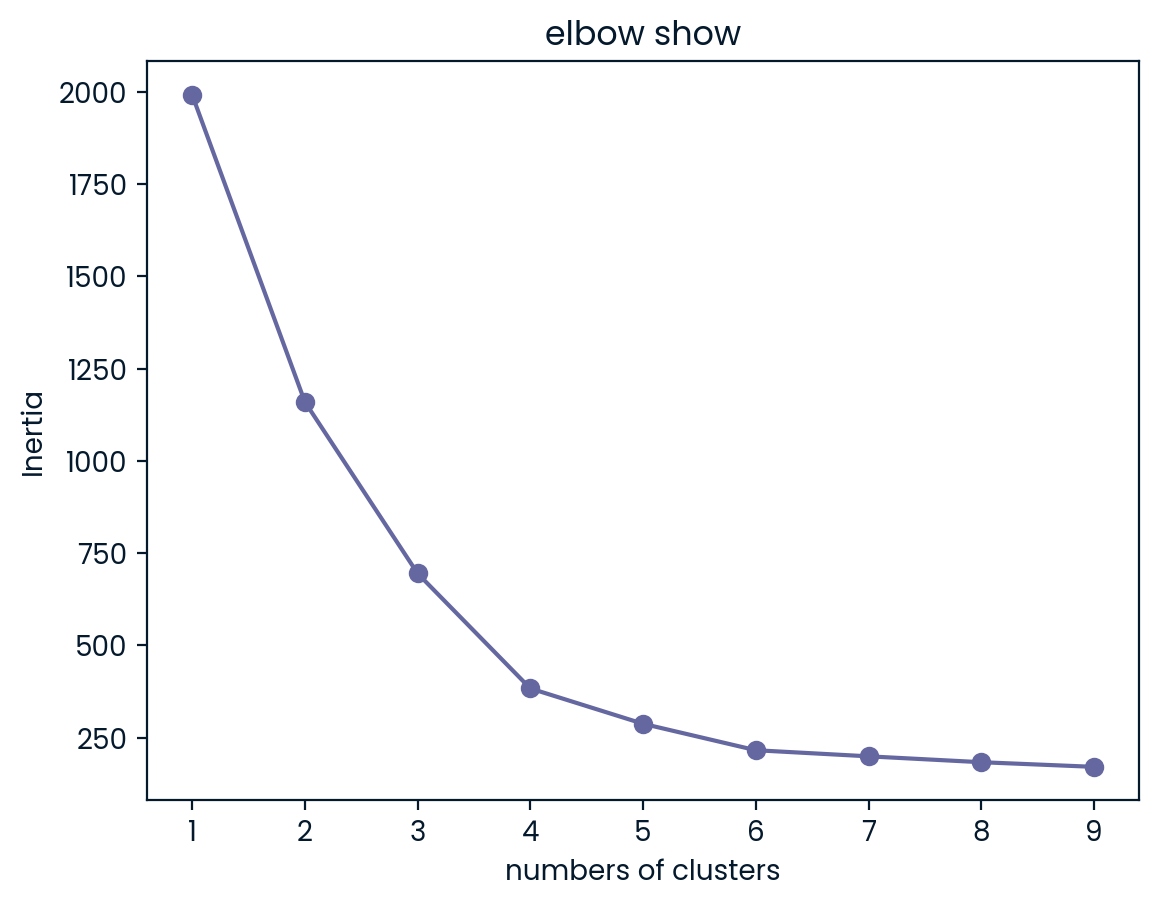

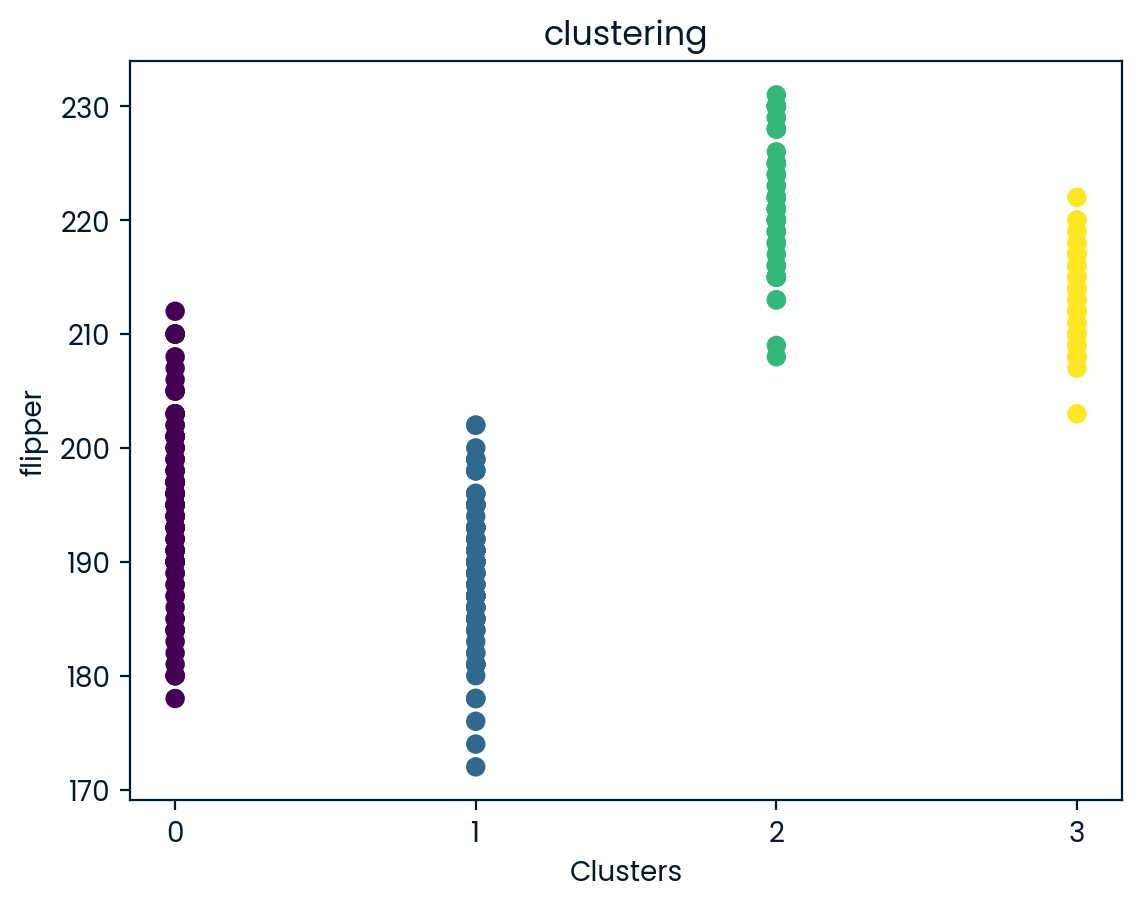

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,49.473770,15.718033,221.540984,5484.836066
3,45.563793,14.237931,212.706897,4679.741379


In [30]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()
penguins_df = pd.get_dummies(penguins_df, dtype='int')
penguins_df
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed=pd.DataFrame(data=X,columns=penguins_df.columns)

# Determine the optimal numbers of cluster for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('numbers of clusters')
plt.ylabel('Inertia')
plt.title('elbow show')
plt.show()

n_clusters = 4
kmeans = KMeans(n_clusters=4, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

# visualise the clusters 
plt.scatter(penguins_df['label'], penguins_df['flipper_length_mm'], c=kmeans.labels_)
plt.xlabel('Clusters')
plt.ylabel('flipper')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max())+1) )
plt.title('clustering')
plt.show()
penguins_df
# create a finalstatistical datafra
stat_penguins=penguins_df.drop(columns=['sex_MALE','sex_FEMALE']).groupby('label').mean()
stat_penguins